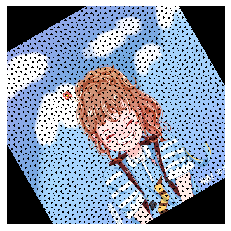

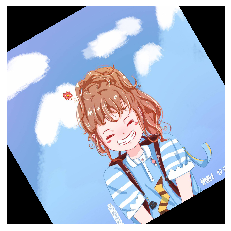

In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
img=np.array(Image.open('test.jpg'))#读取图像
# 旋转参数
theta=30/180*np.pi # 旋转⻆度
cos_theta=np.cos(theta)
sin_theta=np.sin(theta)
center_i=len(img)/2# 中⼼点位置
center_j=len(img[0])/2
# 此处参数是以中⼼点旋转，可⾃⾏添加或修改其他参数。
imgr=np.zeros_like(img)#构造一个矩阵imgr，其维度与矩阵img一致，并为其初始化为全0
#有噪点是因为原来的像素没有映射到这个位置
# 前向变换结果位置
for i in range(len(img)):
    for j in range(len(img[0])):
        yi=int((i-center_i)*cos_theta-(j-center_j)*sin_theta+center_i)
        yj=int((j-center_j)*cos_theta+(i-center_i)*sin_theta+center_j)
        if yi<0 or yj<0 or yi>=len(img) or yj>=len(img[0]):
            continue
        for k in range(3):
            imgr[yi][yj][k]=img[i][j][k]
# 输出结果图像
fig1=plt.figure()
ax=plt.subplot(111)
ax.imshow(imgr)
ax.axis('off')
plt.show()
#后向变换是遍历结果的所有位置，去找原来图像对应位置的像素
imgR=np.zeros_like(img)# 后向变换结果位置
for i in range(len(img)):
    for j in range(len(img[0])):
        xi=int((i-center_i)*cos_theta+(j-center_j)*sin_theta+center_i)
        xj=int((j-center_j)*cos_theta-(i-center_i)*sin_theta+center_j)
        if xi<0 or xj<0 or xi>=len(img) or xj>=len(img[0]):
            continue
        for k in range(3):
            imgR[i][j][k]=img[xi][xj][k]
# 输出结果图像
fig2=plt.figure()
ax=plt.subplot(111)
ax.imshow(imgR)
ax.axis('off')
plt.show()
# 保存结果图像
fig1.savefig('fig1.jpg')
fig2.savefig('fig2.jpg') 


In [1]:
import cv2 #引⼊opencv模块
import numpy as np #引⼊numpy模块
img = cv2.imread('test.jpg') #载⼊图⽚
#显示原图⽚5秒
cv2.imshow('img', img)
cv2.waitKey(5000)
cv2.destroyAllWindows()
height, width, channel = img.shape #读取图⽚尺⼨
new_height, new_width = 2*height, 2*width #新设图⽚尺⼨
dst = np.zeros((new_height, new_width, 3), dtype=np.uint8) #新设图⽚
s_1,s_2 = height//2, width//2 #原图像旋转中⼼坐标
d_1,d_2 = height, width #旋转后图⽚的旋转中⼼坐标
delta = 30
cosd = (np.cos(delta / 180*np.pi))
sind = (np.sin(delta / 180*np.pi))
#前向映射
for x_1 in range(0, height):
    for x_2 in range(0, width):
        y_1 =int(cosd*(x_1-s_1)-sind*(x_2-s_2)+d_1)
        y_2 =int(sind*(x_1-s_1)+cosd*(x_2-s_2)+d_2)
        dst[y_1, y_2] = img[x_1, x_2] #在对应位置填⼊像素
#显示旋转后的图⽚5秒
cv2.imshow('dst', dst)
cv2.waitKey(5000)
cv2.destroyAllWindows()
#重设图⽚
dst = np.zeros((new_height, new_width, 3), dtype=np.uint8) #后向映射
for y_1 in range(0, new_height):
    for y_2 in range(0, new_width):
        x_1 = int(0.5*(cosd*(y_1-d_1)+sind*(y_2-d_2))+s_1) 
        x_2 = int(0.5*(-sind*(y_1-d_1)+cosd*(y_2-d_2))+s_2)
        if height > x_1 >= 0 and width > x_2 >= 0:
            dst[y_1, y_2] = img[x_1, x_2] #在对应位置填⼊像素
#显示旋转后的图⽚5秒
cv2.imshow('dst', dst)
cv2.waitKey(5000)
cv2.destroyAllWindows()

error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/highgui/src/window.cpp:376: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [ ]:
! pip install opencv-python

     |█████▎                          | 7.9MB 15kB/s eta 0:43:5420